<p align="center">
<img src="https://cdn.datacamp.com/main-app/assets/brand/datacamp-horizontal-rgb-b641f95b7bdd7560b554c761a0b4910f9619907dd823c0e41244ed72078723bf.svg" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **How to transition from Spreadsheets to Python**


Welcome to this live, hands-on training where you will learn how to upgrade from being a spreadsheet user to using Python. 

In most organizations across all industries, data fluency, technical skills and a data-driven mindset are becoming sought after skills that drive organizational success in the digital age. This shift has spurred on the adoption of tools that go beyond spreadsheets, which allow for more robust data analysis, visualization and presentation. In this notebook, you will learn:

* How to import Excel files into `pandas`.
* Filter, add new columns, and explore DataFrames.
* Apply common spreadsheets operations such as pivot tables and VLOOKUP in Python.
* Present data as visualizations using `matplotlib` and `seaborn`.

The dataset to be used in this webinar is an Excel file named `sales_data_dirty.xlsx` - it contains 4 sheets, each containing the following columns:

<br>



![alt](https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/image.png?raw=true)

## **Getting started with the dataset**

Similar to how you can download software (excel, tableau etc..) on your computer that allows you perform specific functions (data analysis, visualization ...) - Python has packages or modules that we download and install that allows to perform a set of tasks. We can also set aliases for these packages to shorten their name and make calling them more convenient. 

In [0]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Import the data
data = pd.ExcelFile('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/sales_data_dirty.xlsx?raw=true')

In [3]:
# Print the name of the sheets
data.sheet_names

['sales', 'customers', 'dates', 'employees']

In [0]:
# Parse sales data
sales = data.parse('sales')
# Print dimensions and glimpse
print(sales.shape)
sales.head(5)

(31465, 5)


,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,43659,23153.2339,12,0,5
1,43660,1457.3288,2,0,5
2,43661,36865.8012,15,0,5
3,43662,32474.9324,22,0,5
4,43663,472.3108,1,0,5


In [0]:
# Parse customers data 
customers = data.parse('customers')
# Print dimensions and glimpse
print(customers.shape)
customers.head(5)

(31465, 6)


,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,NaN,NaN,Tsvi,Reiter,NaN
1,43660,NaN,NaN,Tsvi,Reiter,NaN
2,43661,NaN,NaN,José,Saraiva,NaN
3,43662,NaN,NaN,José,Saraiva,NaN
4,43663,NaN,NaN,Linda,Mitchell,NaN


***Insight 1:*** There is missing data for `CustomerFirstName`, `CustomerLastName`, `EmployeeFirstName`, `EmployeeLastName` and `ChannelType` - we need to better understand the mechanisms of why this data is missing and how to best approach it.

In [0]:
# Parse dates data
dates = data.parse('dates')
# Print dimensions and glimpse
print(dates.shape)
dates.head(5)

(31465, 3)


,SalesOrderID,OrderDate,ShipDate
0,43659,2011-05-31 00:00:00,2011-06-07 00:00:00
1,43660,2011-05-31 00:00:00,2011-06-07 00:00:00
2,43661,2011-05-31 00:00:00,2011-06-07 00:00:00
3,43662,2011-05-31 00:00:00,2011-06-07 00:00:00
4,43663,2011-05-31 00:00:00,2011-06-07 00:00:00


***Insight 2:*** When looking at date variables in Python and in pandas DataFrames - it's always good to remember the `datetime` data type that allows better manipulation of date variables.

In [0]:
# Parse employees data
employees = data.parse('employees')
# Print dimensions and glimpse
print(employees.shape)
employees.head(5)

(17, 5)


,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,Amy,Alberts,GB,United Kingdom,0.000
1,David,Campbell,US,Northwest,0.012
2,Garrett,Vargas,CA,Canada,0.010
3,Jae,Pak,CA,Canada,0.020
4,Jillian,Carson,US,Southwest,0.015


## **Better understanding our data**


In [0]:
# Understand missingness of sales data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
SalesOrderID       31465 non-null int64
TotalDue           31465 non-null float64
NumberofItems      31465 non-null int64
OnlineOrderFlag    31465 non-null int64
Status             31465 non-null int64
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


***Insight 3:*** There is no missing data or nothing out of the ordinary in this dataset so far. Let's dig deeper.

In [0]:
# Understand distribution of sales data
sales.describe()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
count,31465.000000,31465.000000,31465.000000,31465.000000,31465.0
mean,59391.000000,3915.995109,3.855617,0.879040,5.0
std,9083.307446,12515.462713,7.214877,0.326086,0.0
min,43659.000000,1.518300,1.000000,0.000000,5.0
25%,51525.000000,62.951900,1.000000,1.000000,5.0
50%,59391.000000,865.204000,2.000000,1.000000,5.0
75%,67257.000000,2615.490800,3.000000,1.000000,5.0
max,75123.000000,187487.825000,72.000000,1.000000,5.0


***Insight 4:*** Taking a look at the `Status` column, we notice that the minimum, maximmum, mean are the same, meaning there's no variability in that column. The `OnlineOrderFlag` column seems to be binary 1,0.

In [0]:
# Make sure Status column has no other unique values
print("Unique values of Status:", sales['Status'].unique())
print("Unique values of OnlineOrderFlag:", sales['OnlineOrderFlag'].unique())

Unique values of Status: [5]
Unique values of OnlineOrderFlag: [0 1]


In [0]:
# Understand column types of dates and missingness
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
SalesOrderID    31465 non-null int64
OrderDate       31465 non-null object
ShipDate        31465 non-null object
dtypes: int64(1), object(2)
memory usage: 737.6+ KB


***Insight 5:*** Confirming our initial hunch, the `OrderDate` and `ShipDate` columns are not `datetime` objects.

In [0]:
# Let's understand the degree of missingness in customers dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
SalesOrderID         31465 non-null int64
CustomerFirstName    17463 non-null object
CustomerLastName     17463 non-null object
EmployeeFirstName    3806 non-null object
EmployeeLastName     3806 non-null object
ChannelType          17463 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [0]:
# How to find missing values?
customers.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType          14002
dtype: int64

***Insight 6:*** We notice that both customer, employee names and channel type contain missing data. Data can be missing for a variety of reasons, ranging from random to non-random causes. As such, treating missing data is highly case dependent with solutions ranging from:
* Dropping missing data
* Imputing with statistical measures such as mean, median and mode
* Algorithmic imputations relying on machine learning 
* Imputation using rules that fit the business case

In this case, the customer name is not present for B2B purchases by design - and that B2C purchases don't have employees attached to them also by design - meaning from these rules we can impute the `ChannelType` variable.

## **Making our data analysis**


***Insight 4*** taught us that the `Status` column from the `sales` sheet is not really useful - so let's drop it! 

In [0]:
# Drop status column from sales
sales.drop('Status', axis = 1, inplace = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 4 columns):
SalesOrderID       31465 non-null int64
TotalDue           31465 non-null float64
NumberofItems      31465 non-null int64
OnlineOrderFlag    31465 non-null int64
dtypes: float64(1), int64(3)
memory usage: 983.4 KB


***Insight 4*** taught us that the `OnlineOrderFlag` column from the `sales` sheet is a binary variable with the values `0`,`1` - let''s replace the values with something a bit more readable.

In [0]:
# Replace OnlineOrderFlag to offline and online
sales['OnlineOrderFlag'] = sales['OnlineOrderFlag'].replace({0: "offline", 
                                                             1: "online"})
# Make sure it is the case
sales['OnlineOrderFlag'].unique()

array(['offline', 'online'], dtype=object)

***Insights 2 and 5*** taught us that the `OrderDate` and `ShipDate` columns from the `dates` sheet are bit `datetime` objects - so let's convert them to that! 

In [0]:
# Convert data columns to datetime while keeping only Y,m,d
dates['OrderDate']= pd.to_datetime(dates['OrderDate'], format = '%Y-%m-%d') 
dates['ShipDate']= pd.to_datetime(dates['ShipDate'], format = '%Y-%m-%d') 

In [0]:
# Make sure now into datetime
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
SalesOrderID    31465 non-null int64
OrderDate       31465 non-null datetime64[ns]
ShipDate        31465 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 737.6 KB


***Insight 6*** taught us that missing data can be found for a variety of reasons, and that imputing them can be done in many ways, including creating rules that fit the business case behind the data and require some domain-knowledge. The `ChannelType` column has been imputed to reflect:

- If `EmployeeFirstName` missing --> B2C purchase
- If `EmployeeFirstName` not missing --> B2B purchase 

In [0]:
# Replace PersonType current with B2C
customers['ChannelType'] = customers['ChannelType'].replace({"IN":"B2C"})

In [0]:
# Impute missing values based on key business assumptions
customers.loc[customers['EmployeeFirstName'].isnull(), 'ChannelType'] = "B2C"
customers.loc[customers['EmployeeFirstName'].notnull(), 'ChannelType'] = "B2B"

In [0]:
# Make sure no more missing data in ChannelType
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
SalesOrderID         31465 non-null int64
CustomerFirstName    17463 non-null object
CustomerLastName     17463 non-null object
EmployeeFirstName    3806 non-null object
EmployeeLastName     3806 non-null object
ChannelType          31465 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [0]:
# Combine first and last name in customers
customers['EmployeeFullName'] = customers['EmployeeFirstName'] + ' ' + customers['EmployeeLastName']
customers.head()

,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [0]:
# Combine first and last name in employees
employees['FullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head()

,FirstName,LastName,CountryCode,RegionName,CommissionPct,FullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell
2,Garrett,Vargas,CA,Canada,0.010,Garrett Vargas
3,Jae,Pak,CA,Canada,0.020,Jae Pak
4,Jillian,Carson,US,Southwest,0.015,Jillian Carson


## **Case studies**

### _Q1: How did we do in revenue over the years?_

Since we have revenue data for each `SalesOrderID` in the `sales` sheet - and the order date and ship date for each `SalesOrderID` in hte `dates` sheet - we can combine similar to how a VLOOKUP would work in spreadsheets with a DataFrame's `.merge()` method. 

An example of how to merge a DataFrame in pandas is included below, where we are merging `df_2` into `df_1` on a common column between them called `common_column`. The `how` argument determines which DataFrame to preserve - in this case it's `df_1` since it's on the **left**. This has the same logic as SQL joins as well.

`df_1.merge(df_2, on = 'common_column', how = 'left')`


In [0]:
# Merge data - the VLOOKUP of Excel
sales_date = sales.merge(dates, on="SalesOrderID", how = "left")
sales_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07
4,43663,472.3108,1,offline,2011-05-31,2011-06-07


In [0]:
# Create column for year and month
sales_date['Order_Year'] = sales_date['OrderDate'].dt.year
sales_date['Order_YM'] = sales_date['OrderDate'].dt.strftime('%Y-%m')

To calculate the total revenue per year, we need to perform something like a PIVOT TABLE in spreadsheet softwares. In pandas, there's a variety of ways to acheive this - there is even a `.pivot_table()` method. However we will be using instead the `.groupby()` method which takes in as argument the column name being grouped by, and can be chained with other methods to compute interesting statistics. Here's an example of grouping by the column `col_A` of the example DataFrame `df_1` and computing the sum of the remaining columns:

`df_1.groupby('col_A').sum()`

In [0]:
# Extract revenue by year
sales_by_year = sales_date.groupby('Order_Year').sum().reset_index()
sales_by_year.head()

,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,2011,71450434,1.415570e+07,5716
1,2012,184878045,3.767570e+07,21689
2,2013,798042413,4.896589e+07,56573
3,2014,814366923,2.241950e+07,37339


There are many ways to perform visualizations in Python - the two most widely used visualization packages are `seaborn` (which is usually imported as `sns`) and `matplotlib.pyplot` (which is usually imported as `plt`). 

Without going into the details, we will be creating and customizing two types of visualizations in this notebook by using these functions:

- Barplots using `sns.barplot(x=,y=,data=)`
  - `x`: The column name to be used on the x-axis.
  - `y`: The column name to be used on the y-axis.
  - `data`: The data used to visualize
- Lineplots using `sns.lineplot(x=,y=,data=)`
  - `x`: The column name to be used on the x-axis.
  - `y`: The column name to be used on the y-axis.
  - `data`: The data used to visualize
- Setting figure labels by:
  - `plt.xlabel()` to set the x-axis label.
  - `plt.ylabel()` to set the y-axis label.
  - `plt.title()` to set the x-axis label.
  - `plt.xticks(rotation=)` to set the x-axis ticks with proper rotation
- Showing the plot with `plt.show()`

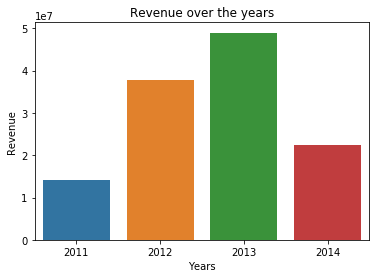

In [0]:
# Visualize it
sns.barplot(x = 'Order_Year', y = 'TotalDue', data = sales_by_year)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

In [0]:
# Is there seasonality?
sales_by_year_month = sales_date.groupby('Order_YM').sum().reset_index()
sales_by_year_month.head()

,Order_YM,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,2011-05,1878240,5.670209e+05,357,86473
1,2011-06,6171852,5.070965e+05,141,283551
2,2011-07,10154298,2.292183e+06,941,464541
3,2011-08,11049625,2.800576e+06,1242,502750
4,2011-09,6971114,5.547916e+05,157,315727


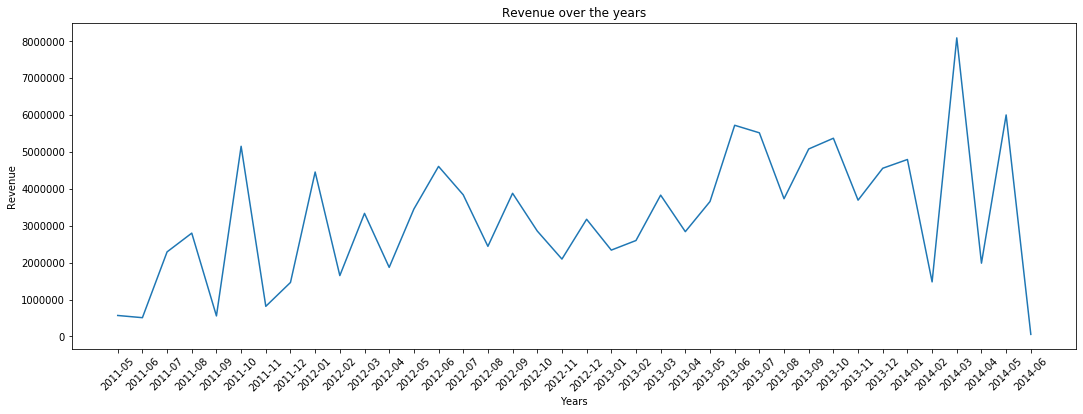

In [0]:
# Visualize it
plt.figure(figsize=(18, 6))
sns.lineplot(x = 'Order_YM', y = 'TotalDue', data = sales_by_year_month)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.title("Revenue over the years")
plt.show()

### _Q2: How is revenue divided by channel type overall and over time?_

Similar to how we merged the `sales` sheet with the `dates` sheet when answering Q1, we will be merging the `sales` sheet with the `customers` sheet to get the channel type, employee and customer names for each `SalesOrderID`.

In [0]:
# Merge sales and customer data
sales_customers = sales.merge(customers, on = "SalesOrderID", how = "left")
sales_customers.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,23153.2339,12,offline,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,offline,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,offline,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,offline,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,offline,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [0]:
# Identify revenue and amount sold by channel
sales_by_channel = sales_customers.groupby('ChannelType').sum().reset_index()
sales_by_channel.head()

,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,B2B,204462343,9.077545e+07,60919
1,B2C,1664275472,3.244134e+07,60398


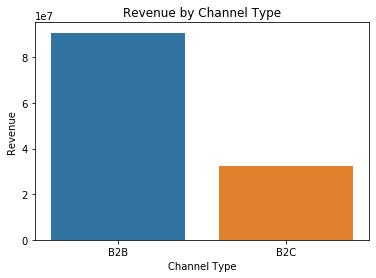

In [0]:
# Visualize
sns.barplot(x = 'ChannelType', y = 'TotalDue', data = sales_by_channel)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("Revenue by Channel Type")
plt.show()

The results clearly demonstrate that the B2B channel provides much more revenue from the B2C channel, however what if we want a temporal dimension? To do this, we can first merge `sales_date` created when answering question 1 with the `customers` sheet on `SalesOrderID`. 

In [0]:
# Merge sales, dates and customers data
sales_customers_date = sales_date.merge(customers, on = "SalesOrderID", how = "left")
sales_customers_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,EmployeeFullName
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [0]:
# Group by year by channel type
sales_by_channel_date = sales_customers_date.groupby(['Order_Year', 'ChannelType']).sum().reset_index()
sales_by_channel_date.head()

,Order_Year,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,2011,B2B,17999103,9.886952e+06,4515
1,2011,B2C,53451331,4.268748e+06,1201
2,2012,B2B,55440422,3.061409e+07,18946
3,2012,B2C,129437623,7.061613e+06,2743
4,2013,B2B,87767978,3.710689e+07,27614


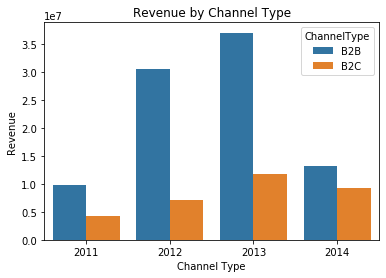

In [0]:
# Visualize
sns.barplot(x = 'Order_Year', y = 'TotalDue', hue = "ChannelType", data = sales_by_channel_date)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("Revenue by Channel Type")
plt.show()

### _Q3: Who are the employees responsible for the most B2B sales overall and in 2013?_

In [0]:
# Group by employee performance
sales_employees = sales_customers_date.groupby('EmployeeFullName').sum().reset_index()
sales_employees.head()

,EmployeeFullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,Amy Alberts,2155978,8.264175e+05,586,78503
1,David Campbell,9966638,4.207895e+06,2247,380364
2,Garrett Vargas,12415186,4.069422e+06,3284,470937
3,Jae Pak,19195780,9.585125e+06,6738,700480
4,Jillian Carson,24928694,1.134239e+07,7825,951928


To be able to truly see the highest earning employees - we can use the `.sort_values()` method of a DataFrame. For example, we can sort `col_A` of the example DataFrame `df_1` as such:

`df_1.sort_values(by=,ascending=,inplace=)`

* `by` takes in the column name being sorted by
* `ascending` takes in `True` or `False` depending on whether we want to sort it by ascending order
* `inplace` takes in `True` or `False` depending on whether we want to save our changes in the same DataFrame being sorted.

In [0]:
# Sort it so we visualize it correctly
sales_employees.sort_values('TotalDue', ascending=True, inplace = True)
sales_employees.head()

,EmployeeFullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
14,Syed Abbas,964779,1.955288e+05,245,32212
0,Amy Alberts,2155978,8.264175e+05,586,78503
13,Stephen Jiang,2516344,1.235934e+06,792,96602
7,Lynn Tsoflias,6663235,1.606441e+06,1468,219460
10,Rachel Valdez,7870176,2.062393e+06,1783,261734


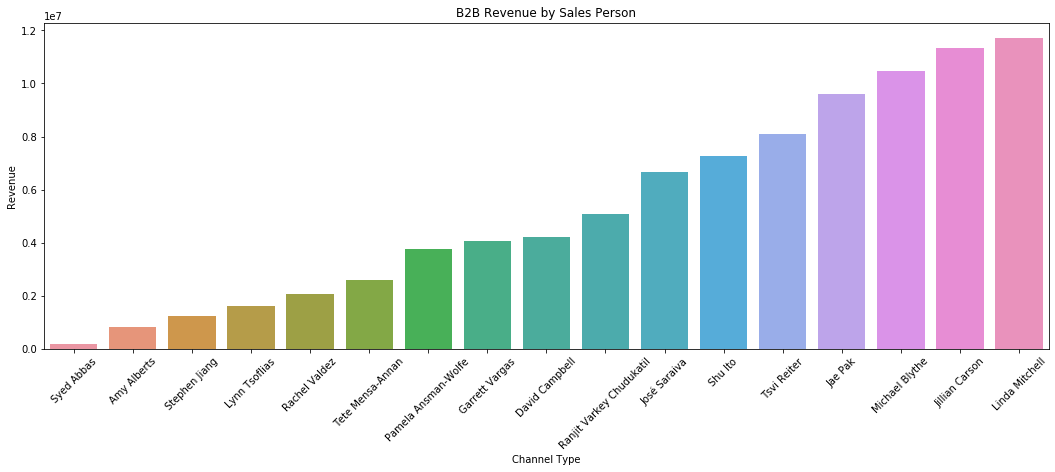

In [0]:
# Visualize
plt.figure(figsize=(18, 6))
sns.barplot(x = 'EmployeeFullName', y = 'TotalDue', data = sales_employees)
plt.xticks(rotation = 45)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("B2B Revenue by Sales Person")
plt.show()

In [0]:
# Group by employee performance and year
sales_employees = sales_customers_date.groupby(['EmployeeFullName', 'Order_Year']).sum().reset_index()
sales_employees.head()

,EmployeeFullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,Amy Alberts,2012,335313,1.306670e+05,103
1,Amy Alberts,2013,1618710,6.320026e+05,453
2,Amy Alberts,2014,201955,6.374784e+04,30
3,David Campbell,2011,1242002,6.756637e+05,220
4,David Campbell,2012,2978792,1.453583e+06,741


In [0]:
# Sort to make it easier to visualize
sales_employees.sort_values(['Order_Year','TotalDue'], ascending=True, inplace = True)
sales_employees.head()

,EmployeeFullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
45,Stephen Jiang,2011,176971,32567.9155,17
7,Garrett Vargas,2011,1329262,563326.5478,284
3,David Campbell,2011,1242002,675663.6940,220
32,Pamela Ansman-Wolfe,2011,974811,730273.4889,273
28,Michael Blythe,2011,2882387,986298.0902,623


In [0]:
# Who was the best last year?
sales_employees_2013 = sales_employees[sales_employees['Order_Year'] == 2013]

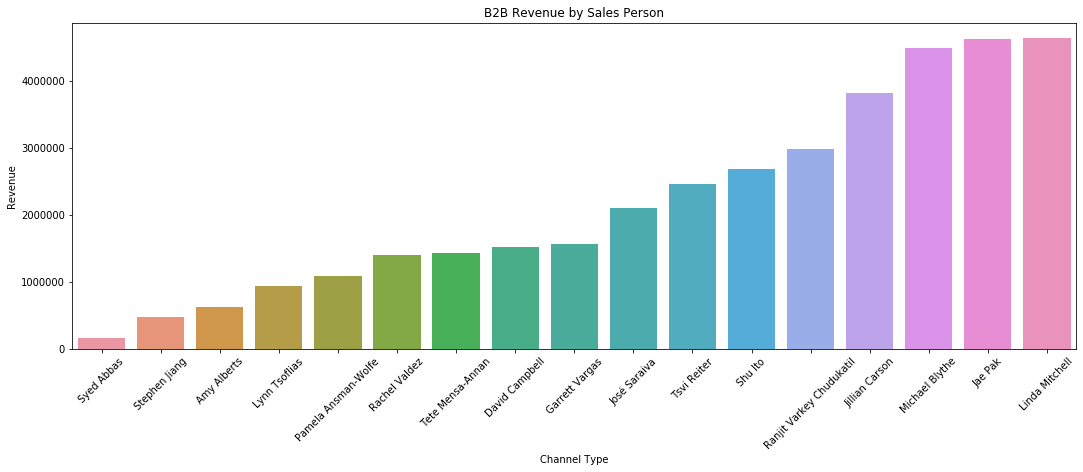

In [0]:
# Visualize
plt.figure(figsize=(18, 6))
sns.barplot(x = 'EmployeeFullName', y = 'TotalDue', data = sales_employees_2013)
plt.xticks(rotation = 45)
plt.xlabel("Channel Type")
plt.ylabel("Revenue")
plt.title("B2B Revenue by Sales Person")
plt.show()

### _Take-home question: Who were the highest earning (in compensation) employees in 2012?_

**Clues:**
- Compensation = Sales generated * Commission
- You need to use the all four sheets
- Sort your results by the amount of commission earned 

**Bonus points if:**
- You make your chart extra pretty
- Use syntax not covered in this session
